# US Visa Prediction Project

### Life Cycle of a Machine Learning Project

- **1. Understanding the Problem Statement**
- **2. Data Collection**
- **3. Exploratory Data Analysis**
- **4. Data Cleaning**
- **5. Data Pre-Processing**
- **6. Model Training**
- **7. Choose Best Model**

# About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts in the workplace and maintains requirements when hiring foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem Statement

The OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. Last year, the number of applications was substantial, prompting the OFLC to seek machine learning models to shortlist visa applicants based on historical data.

In this project, we will build a classification model to determine whether a visa will be approved or not based on the given dataset. This model can recommend suitable profiles for applicants whose visas should be certified or denied based on specific criteria influencing the decision.

## 2) Data Collection

The dataset is provided by the Office of Foreign Labor Certification (OFLC) and consists of 25,480 rows and 12 columns. You can access it [here](https://www.kaggle.com/datasets/moro23/easyvisa-dataset).




##### 2.1 Import Data and required packages
<text>Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.</text>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the csv data as pandas dataframe

In [3]:
df = pd.read_csv('visadataset.csv')


Show top 5 records

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of the dataset

In [5]:
df.shape

(25480, 12)

Check datatype in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3. Exploring Data

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [28]:
#categorical_features.remove('case_id')

for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('----------------------------------------------')

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
----------------------------------------------
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
----------------------------------------------
unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504

#### Insight 

<li><b>Case_id</b>: Have unique values for each column which can be dropped as it is of no importance</li>
<li><b>continent</b> : is highly biased towards Asia with majority of 66%</li>
<li><b>unit_of_wage</b> : seems to be an important column as most of them are yearly contracts


### Univariate Analysis
<p>The term univariate analysis refers to the analysis of one variable prefix "uni" means "one" . The purpose of univariate analysis is to understand the distribution of values for a single variable</p>

Other types of Analysis are :
<li><b>Bivariate Analysis</b> : The analysis of two variables</li>
<li><b>Multivariate Analysis</b>:The analysis of two or more variable</li>

### Numerical Features

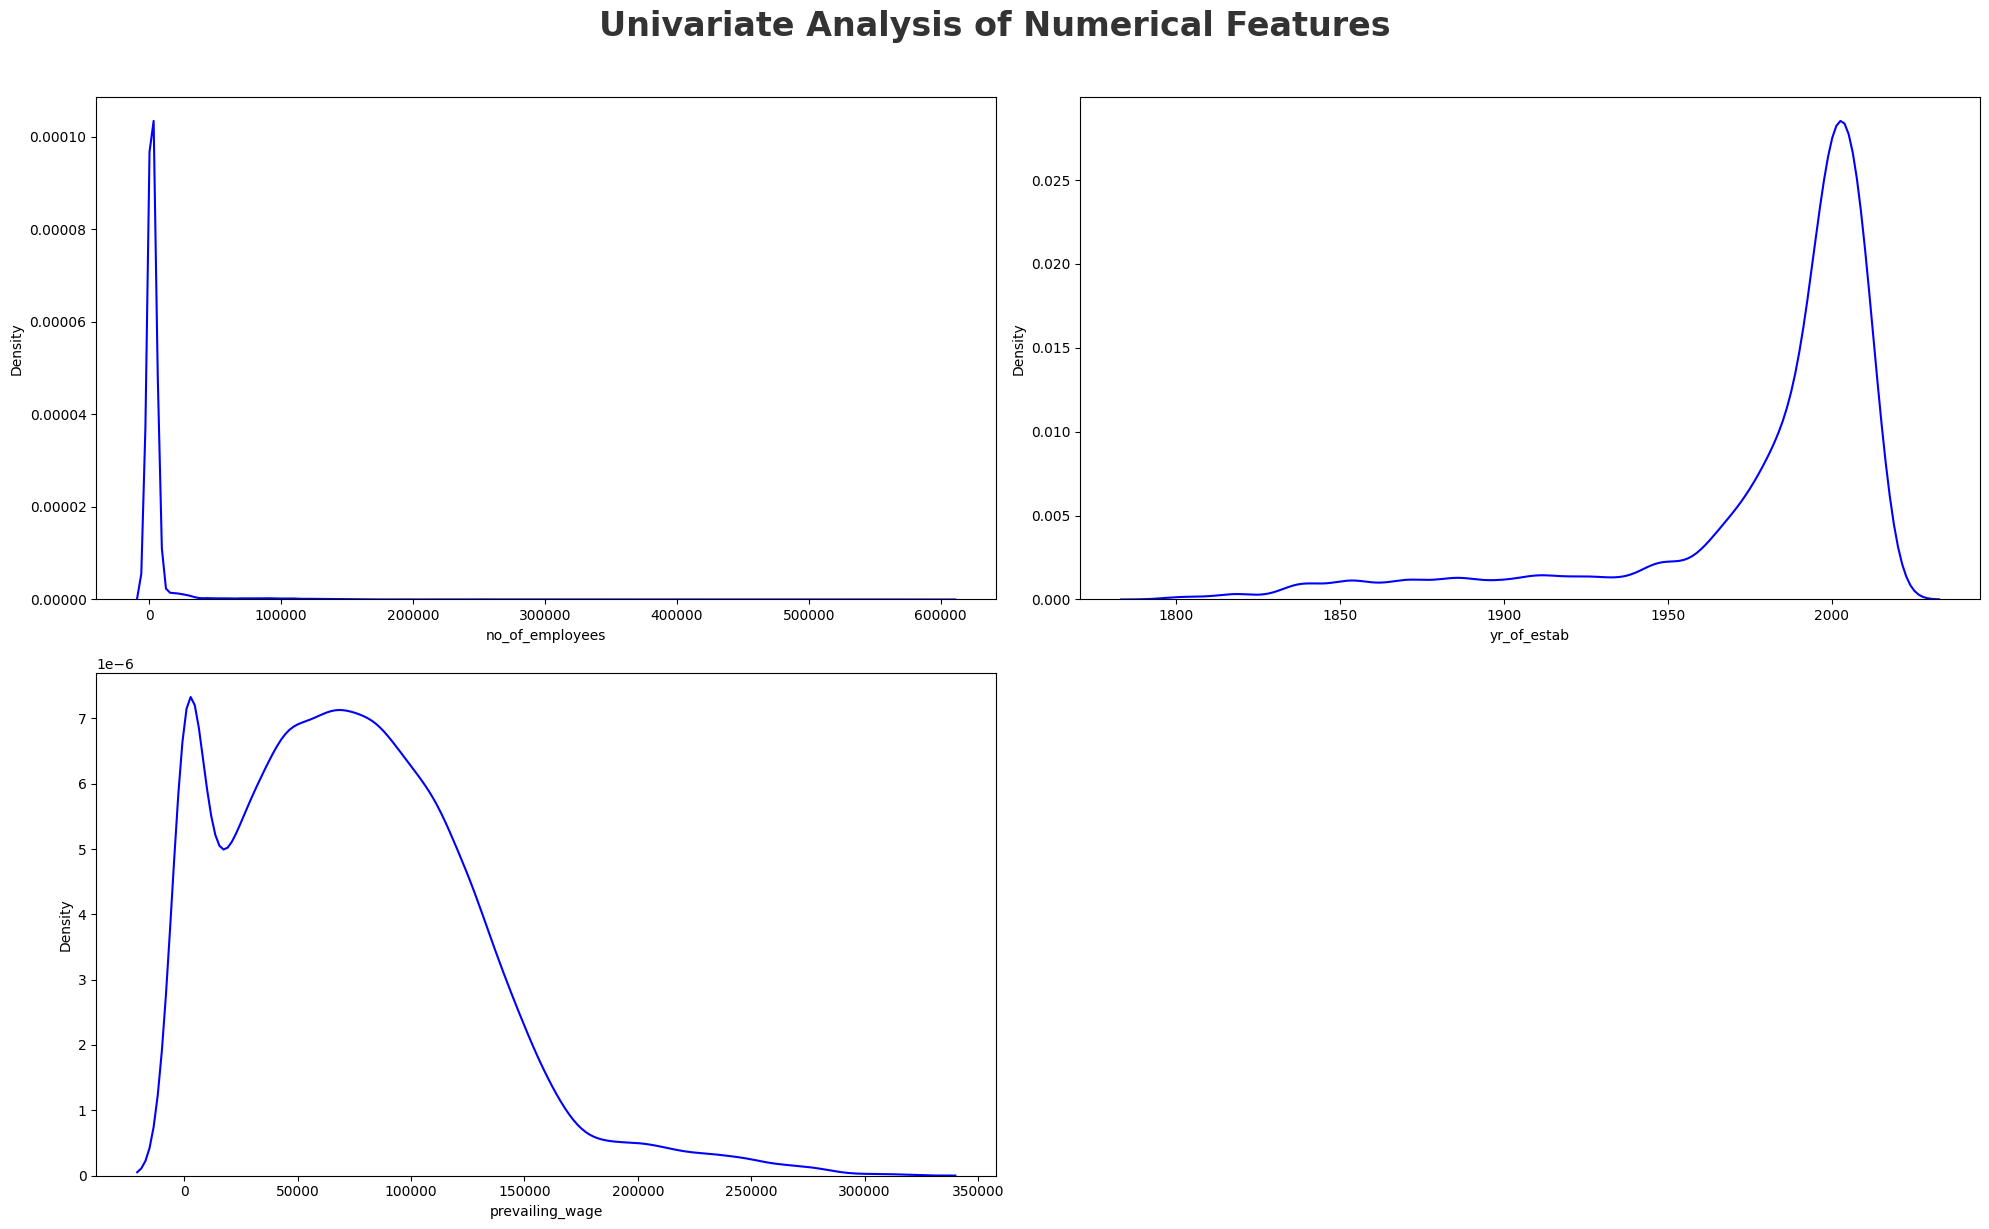

In [50]:
plt.figure(figsize=(20, 12))  
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=24, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numeric_features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.ylabel('Density')  

plt.tight_layout(rect=[0, 0, 1, 1])  
plt.show()
